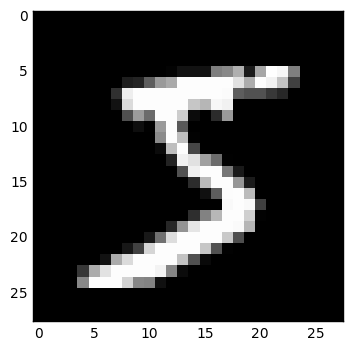

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import edf
import mnist_loader

train_images, train_labels = mnist_loader.load_mnist(section = 'training', path = 'MNIST')
test_images, test_labels = mnist_loader.load_mnist(section = 'testing', path = 'MNIST')

plt.imshow(train_images[0], cmap='gray', interpolation = 'nearest')
plt.show()

In [2]:
"""for debuggin purposes it is useful to
make the computation deterministic"""

np.random.seed(1234)

# Now we build a model with random parameters

x = edf.Input((28*28,))
y = edf.Input((1,))
    
W1 = edf.Parameter(np.random.rand(20,28*28)*.1)
W2 = edf.Parameter(np.random.rand(10,20)*.1)
    
L1 = edf.Sigmoid(edf.Norm(edf.VDot(W1,x)))
L2 = edf.Softmax(edf.Norm(edf.VDot(W2,L1)))
M = edf.Model(edf.NegLog(edf.Aref(L2,y)))
    
"""the following is needed by the learning code below to set
the inputs (input and label are both "inputs" to the model)"""
    
M.x = x
M.y = y


In [ ]:
"""the verify procedure does backpropagation and numerical
differentiation and compares to the two. This is important
for debugging componets.  When writing a new component
one should verify a stub model that uses just that component.
Discrepencies between backprop and numerical differntiation
can be due to bugs, numerical precision issues, or nonlinearities
in the model.  It is good to have your stub model is
operating in a numerically stable regime.  Beware of sigmoids causing
vanishing gradients."""

x.value = np.random.rand(28*28)
y.value = np.zeros(1,np.int64)

edf.verify(M)

In [ ]:
def train(M, nepochs):

    learning_curve = []
    train_curve = []
    for i in range(nepochs):
        train_an_epoch(M)
        learning_curve.append(test_loss(M))
        train_curve.append(train_loss(M))
    return learning_curve, train_curve

def train_an_epoch(M):
    for i in range(train_images.shape[0]):
        M.x.value = train_images[i].reshape((28*28,))
        M.y.value[0] = train_labels[i]
        M.backprop()
        if i%10000 == 0:
            print ("batch: " + str(i))

def test_loss(M):
    total = 0.0
    numtest = test_images.shape[0]
    for i in range(numtest):
        M.x.value = test_images[i].reshape((28*28,))
        M.y.value[0] = test_labels[i]
        M.forward()
        total = total + np.mean(M.loss.value)
    return total/numtest

def train_loss(M):
    total = 0.0
    numtrain = train_images.shape[0]
    for i in range(numtrain):
        M.x.value = train_images[i].reshape((28*28,))
        M.y.value[0] = train_labels[i]
        M.forward()
        total = total + np.mean(M.loss.value)
    return total/numtrain


test_loss, train_loss = train(M,10)

plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(np.arange(10), test_loss, color='red')
plt.plot(np.arange(10), train_loss, color='blue')
plt.legend(['test loss', 'train loss'], loc='upper right')
plt.show()
